=== ALGORITMO K-NEAREST NEIGHBORS (KNN) ===

1. Generando datos de ejemplo...
   - Total de muestras: 60
   - Características: 2 (longitud y ancho del pétalo)
   - Clases: 2 (0: flores pequeñas, 1: flores grandes)

2. Dividiendo datos en entrenamiento y prueba...
   - Entrenamiento: 48 muestras
   - Prueba: 12 muestras

3. Probando diferentes valores de k...
   k=1: Precisión = 1.000 (100.0%)
   k=2: Precisión = 1.000 (100.0%)
   k=3: Precisión = 1.000 (100.0%)
   k=4: Precisión = 1.000 (100.0%)
   k=5: Precisión = 1.000 (100.0%)
   k=6: Precisión = 1.000 (100.0%)
   k=7: Precisión = 1.000 (100.0%)
   k=8: Precisión = 1.000 (100.0%)
   k=9: Precisión = 1.000 (100.0%)
   k=10: Precisión = 1.000 (100.0%)

4. Mejor k encontrado: 1 con precisión de 1.000

5. Ejemplo de predicción individual:
   Punto nuevo: [longitud=3.5, ancho=2.0]
   Predicción: Clase 1
   1 vecinos más cercanos:
     1. Distancia: 0.969, Clase: 1

6. Generando visualización...


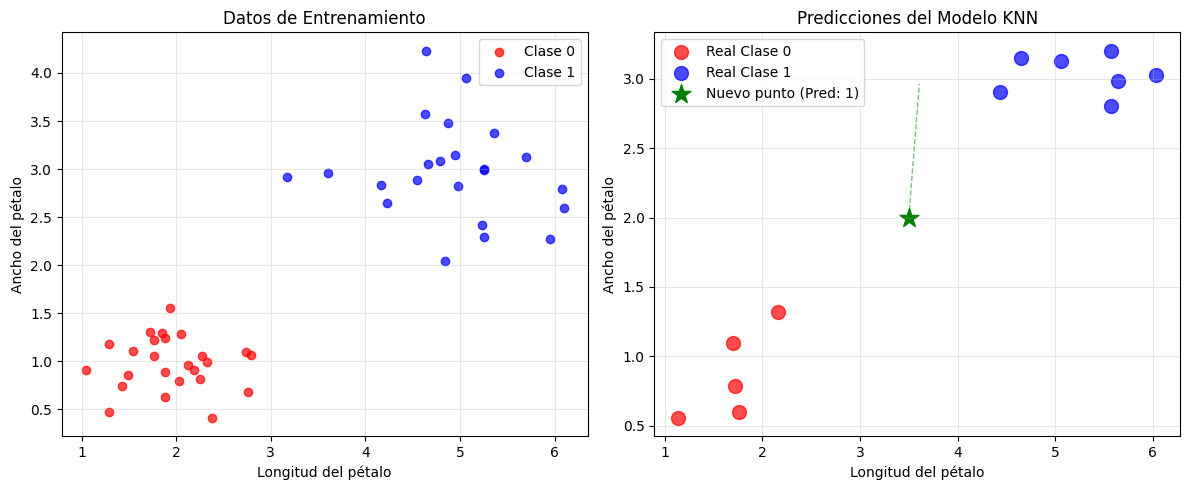


=== RESUMEN FINAL ===
Algoritmo: K-Nearest Neighbors
Mejor k: 1
Precisión final: 1.000 (100.0%)
Errores: 0/12


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

class KNN:
    def __init__(self, k=3):
        """
        Inicializa el clasificador KNN
        k: número de vecinos más cercanos a considerar
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Entrena el modelo (solo guarda los datos)
        X: características de entrenamiento
        y: etiquetas de entrenamiento
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def distancia_euclidiana(self, punto1, punto2):
        """
        Calcula la distancia euclidiana entre dos puntos
        """
        return np.sqrt(np.sum((punto1 - punto2) ** 2))

    def predecir_punto(self, punto):
        """
        Predice la clase de un solo punto
        """
        # Calcular distancias a todos los puntos de entrenamiento
        distancias = []
        for i, punto_entrenamiento in enumerate(self.X_train):
            dist = self.distancia_euclidiana(punto, punto_entrenamiento)
            distancias.append((dist, self.y_train[i]))

        # Ordenar por distancia y tomar los k más cercanos
        distancias.sort()
        k_vecinos = distancias[:self.k]

        # Extraer las etiquetas de los k vecinos más cercanos
        etiquetas_vecinos = [etiqueta for _, etiqueta in k_vecinos]

        # Votar por la clase más común
        voto = Counter(etiquetas_vecinos)
        prediccion = voto.most_common(1)[0][0]

        return prediccion, k_vecinos

    def predecir(self, X):
        """
        Predice las clases para múltiples puntos
        """
        predicciones = []
        for punto in X:
            pred, _ = self.predecir_punto(punto)
            predicciones.append(pred)
        return np.array(predicciones)

    def calcular_precision(self, X_test, y_test):
        """
        Calcula la precisión del modelo
        """
        predicciones = self.predecir(X_test)
        correctas = np.sum(predicciones == y_test)
        precision = correctas / len(y_test)
        return precision

def generar_datos_ejemplo():
    """
    Genera datos de ejemplo para demostrar KNN
    Simula un dataset de flores con 2 características
    """
    np.random.seed(42)

    # Clase 0: Flores pequeñas (pétalos cortos y delgados)
    clase_0_x = np.random.normal(2, 0.5, 30)  # longitud pétalo
    clase_0_y = np.random.normal(1, 0.3, 30)  # ancho pétalo
    clase_0 = np.column_stack((clase_0_x, clase_0_y))
    etiquetas_0 = np.zeros(30)

    # Clase 1: Flores grandes (pétalos largos y anchos)
    clase_1_x = np.random.normal(5, 0.7, 30)  # longitud pétalo
    clase_1_y = np.random.normal(3, 0.5, 30)  # ancho pétalo
    clase_1 = np.column_stack((clase_1_x, clase_1_y))
    etiquetas_1 = np.ones(30)

    # Combinar datos
    X = np.vstack((clase_0, clase_1))
    y = np.hstack((etiquetas_0, etiquetas_1))

    return X, y

def dividir_datos(X, y, porcentaje_entrenamiento=0.8):
    """
    Divide los datos en entrenamiento y prueba
    """
    indices = list(range(len(X)))
    random.shuffle(indices)

    limite = int(len(X) * porcentaje_entrenamiento)
    indices_entrenamiento = indices[:limite]
    indices_prueba = indices[limite:]

    X_train = X[indices_entrenamiento]
    y_train = y[indices_entrenamiento]
    X_test = X[indices_prueba]
    y_test = y[indices_prueba]

    return X_train, X_test, y_train, y_test

def visualizar_resultados(X_train, y_train, X_test, y_test, predicciones, knn, punto_nuevo=None):
    """
    Visualiza los datos y resultados del KNN
    """
    plt.figure(figsize=(12, 5))

    # Gráfico 1: Datos de entrenamiento
    plt.subplot(1, 2, 1)
    colores = ['red', 'blue']
    for i in range(2):
        mask = y_train == i
        plt.scatter(X_train[mask, 0], X_train[mask, 1],
                   c=colores[i], label=f'Clase {i}', alpha=0.7)

    plt.xlabel('Longitud del pétalo')
    plt.ylabel('Ancho del pétalo')
    plt.title('Datos de Entrenamiento')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfico 2: Predicciones en datos de prueba
    plt.subplot(1, 2, 2)
    for i in range(2):
        mask = y_test == i
        plt.scatter(X_test[mask, 0], X_test[mask, 1],
                   c=colores[i], label=f'Real Clase {i}', alpha=0.7, s=100)

    # Mostrar predicciones incorrectas
    incorrectas = predicciones != y_test
    if np.any(incorrectas):
        plt.scatter(X_test[incorrectas, 0], X_test[incorrectas, 1],
                   c='black', marker='x', s=100, label='Predicción incorrecta')

    # Si hay un punto nuevo, mostrarlo
    if punto_nuevo is not None:
        prediccion_nueva, vecinos = knn.predecir_punto(punto_nuevo)
        plt.scatter(punto_nuevo[0], punto_nuevo[1],
                   c='green', marker='*', s=200, label=f'Nuevo punto (Pred: {int(prediccion_nueva)})')

        # Mostrar los k vecinos más cercanos
        for dist, etiqueta in vecinos:
            for j, punto in enumerate(knn.X_train):
                if knn.distancia_euclidiana(punto_nuevo, punto) == dist and knn.y_train[j] == etiqueta:
                    plt.plot([punto_nuevo[0], punto[0]], [punto_nuevo[1], punto[1]],
                            'g--', alpha=0.5, linewidth=1)
                    break

    plt.xlabel('Longitud del pétalo')
    plt.ylabel('Ancho del pétalo')
    plt.title('Predicciones del Modelo KNN')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def ejemplo_detallado():
    """
    Ejecuta un ejemplo detallado del algoritmo KNN
    """
    print("=== ALGORITMO K-NEAREST NEIGHBORS (KNN) ===\n")

    # Generar datos
    print("1. Generando datos de ejemplo...")
    X, y = generar_datos_ejemplo()
    print(f"   - Total de muestras: {len(X)}")
    print(f"   - Características: {X.shape[1]} (longitud y ancho del pétalo)")
    print(f"   - Clases: {len(np.unique(y))} (0: flores pequeñas, 1: flores grandes)")

    # Dividir datos
    print("\n2. Dividiendo datos en entrenamiento y prueba...")
    X_train, X_test, y_train, y_test = dividir_datos(X, y)
    print(f"   - Entrenamiento: {len(X_train)} muestras")
    print(f"   - Prueba: {len(X_test)} muestras")

    # Probar diferentes valores de k
    print("\n3. Probando diferentes valores de k...")
    mejores_k = []
    for k in range(1, 11):
        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        precision = knn.calcular_precision(X_test, y_test)
        mejores_k.append((k, precision))
        print(f"   k={k}: Precisión = {precision:.3f} ({precision*100:.1f}%)")

    # Elegir el mejor k
    mejor_k = max(mejores_k, key=lambda x: x[1])
    print(f"\n4. Mejor k encontrado: {mejor_k[0]} con precisión de {mejor_k[1]:.3f}")

    # Crear modelo final
    knn_final = KNN(k=mejor_k[0])
    knn_final.fit(X_train, y_train)
    predicciones = knn_final.predecir(X_test)

    # Ejemplo de predicción individual
    print("\n5. Ejemplo de predicción individual:")
    punto_nuevo = np.array([3.5, 2.0])  # punto intermedio
    prediccion, vecinos = knn_final.predecir_punto(punto_nuevo)

    print(f"   Punto nuevo: [longitud={punto_nuevo[0]}, ancho={punto_nuevo[1]}]")
    print(f"   Predicción: Clase {int(prediccion)}")
    print(f"   {mejor_k[0]} vecinos más cercanos:")
    for i, (dist, etiqueta) in enumerate(vecinos):
        print(f"     {i+1}. Distancia: {dist:.3f}, Clase: {int(etiqueta)}")

    # Visualizar resultados
    print("\n6. Generando visualización...")
    visualizar_resultados(X_train, y_train, X_test, y_test, predicciones, knn_final, punto_nuevo)

    print(f"\n=== RESUMEN FINAL ===")
    print(f"Algoritmo: K-Nearest Neighbors")
    print(f"Mejor k: {mejor_k[0]}")
    print(f"Precisión final: {mejor_k[1]:.3f} ({mejor_k[1]*100:.1f}%)")
    print(f"Errores: {np.sum(predicciones != y_test)}/{len(y_test)}")

# Ejecutar el ejemplo
if __name__ == "__main__":
    ejemplo_detallado()